In [1]:
#Import libraries:
import pandas as pd
import numpy as np
import xgboost as xgb
import math
from xgboost import XGBRegressor
from datetime import datetime
from datetime import timedelta

import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
print 'start'

start


In [3]:
data=pd.read_csv('training_data.csv')
pre=pd.read_csv('predict_data.csv')

In [4]:
A2=data.loc[(data['intersection_id']=='A')&(data['tollgate_id']==2)]
A3=data.loc[(data['intersection_id']=='A')&(data['tollgate_id']==3)]
B1=data.loc[(data['intersection_id']=='B')&(data['tollgate_id']==1)]
B3=data.loc[(data['intersection_id']=='B')&(data['tollgate_id']==3)]
C1=data.loc[(data['intersection_id']=='C')&(data['tollgate_id']==1)]
C3=data.loc[(data['intersection_id']=='C')&(data['tollgate_id']==3)]

In [5]:
A2pre=pre.loc[(pre['intersection_id']=='A')&(pre['tollgate_id']==2)]
A3pre=pre.loc[(pre['intersection_id']=='A')&(pre['tollgate_id']==3)]
B1pre=pre.loc[(pre['intersection_id']=='B')&(pre['tollgate_id']==1)]
B3pre=pre.loc[(pre['intersection_id']=='B')&(pre['tollgate_id']==3)]
C1pre=pre.loc[(pre['intersection_id']=='C')&(pre['tollgate_id']==1)]
C3pre=pre.loc[(pre['intersection_id']=='C')&(pre['tollgate_id']==3)]

# A2 model

In [6]:
x_data = A2[['t1','t2','t3','deltat1','deltat2','weekday','hour','check']].values #train 特徵
y_data = A2[['avg_travel_time']].values #labal
x= A2pre[['t1','t2','t3','deltat1','deltat2','weekday','hours','check']].values #train 特徵
y = A2pre[['travel_time']].values #labal

In [7]:
gbm = xgb.XGBRegressor( learning_rate =0.01,
 n_estimators=600,
 max_depth=4,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.75,
 objective= 'reg:linear',
 reg_alpha=1.5,
 reg_lambda= 1.5,
 nthread=4,
 scale_pos_weight=1,
 seed=27).fit(x_data, y_data)

In [8]:
for c in range(len(x)):
    o = gbm.predict(x[c:c+1])
    y[c]=o
    if c+1 == len(x):
        break
    elif (((c+1)%25)!=0):
        x[c+1][0]=o
        x[c+1][1]=x[c][0]
        x[c+1][2]=x[c][1]
        x[c+1][3]=o-x[c][0]
        x[c+1][4]=x[c][0]-x[c][1]

In [9]:
A2pre['travel_time']=y

/Users/only_we/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


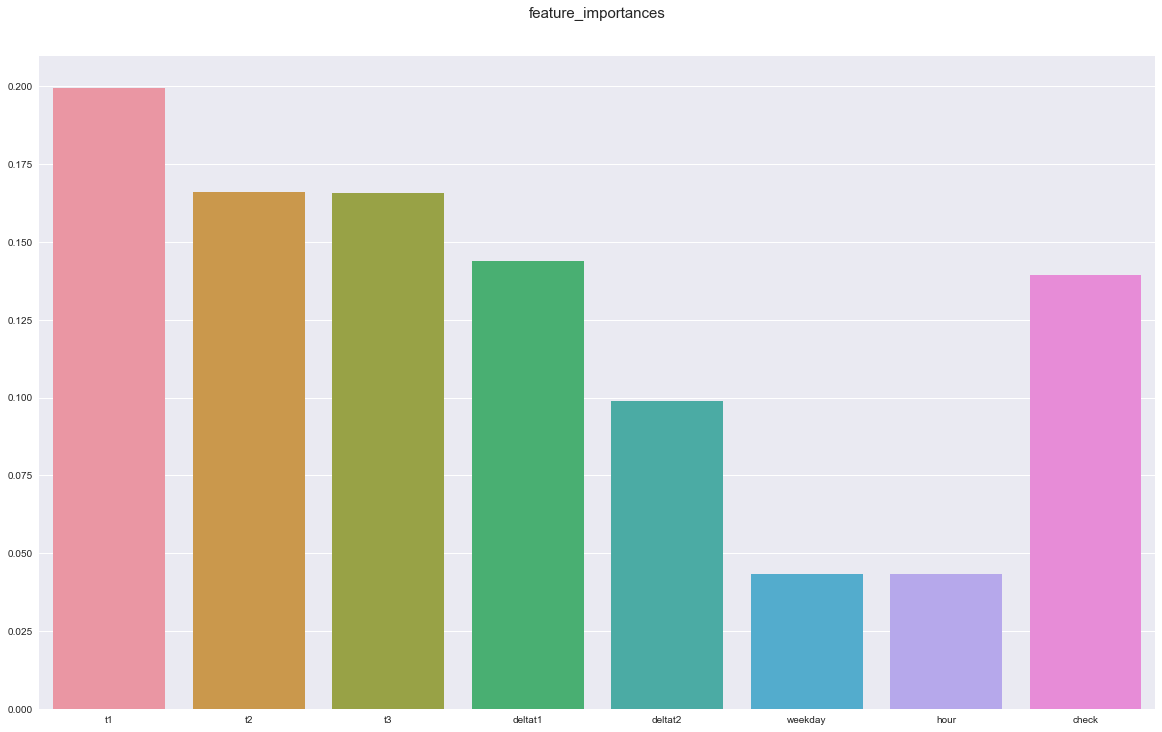

In [10]:
A2_feature=gbm.feature_importances_
feature=pd.DataFrame(data=[A2_feature], columns=['t1','t2','t3','deltat1','deltat2','weekday','hour','check'])
plt.figure(figsize=(20,12))
plt.title('feature_importances', y=1.05, size=15)
sns.barplot(data=feature)

# A3model

In [11]:
x_data = A3[['t1','t2','t3','deltat1','deltat2','weekday','hour','check']].values #train 特徵
y_data = A3[['avg_travel_time']].values #labal
x= A3pre[['t1','t2','t3','deltat1','deltat2','weekday','hours','check']].values #train 特徵
y = A3pre[['travel_time']].values #labal

In [12]:
gbm = xgb.XGBRegressor( learning_rate =0.03,
 n_estimators=600,
 max_depth=4,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.75,
 objective= 'reg:linear',
 reg_alpha=1.5,
 reg_lambda= 1.5,
 nthread=4,
 scale_pos_weight=1,
 seed=27).fit(x_data, y_data)

In [13]:
for c in range(len(x)):
    o = gbm.predict(x[c:c+1])
    y[c]=o
    if c+1 == len(x):
        break
    elif (((c+1)%25)!=0):
        x[c+1][0]=o
        x[c+1][1]=x[c][0]
        x[c+1][2]=x[c][1]
        x[c+1][3]=o-x[c][0]
        x[c+1][4]=x[c][0]-x[c][1]

In [14]:
A3pre['travel_time']=y

/Users/only_we/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


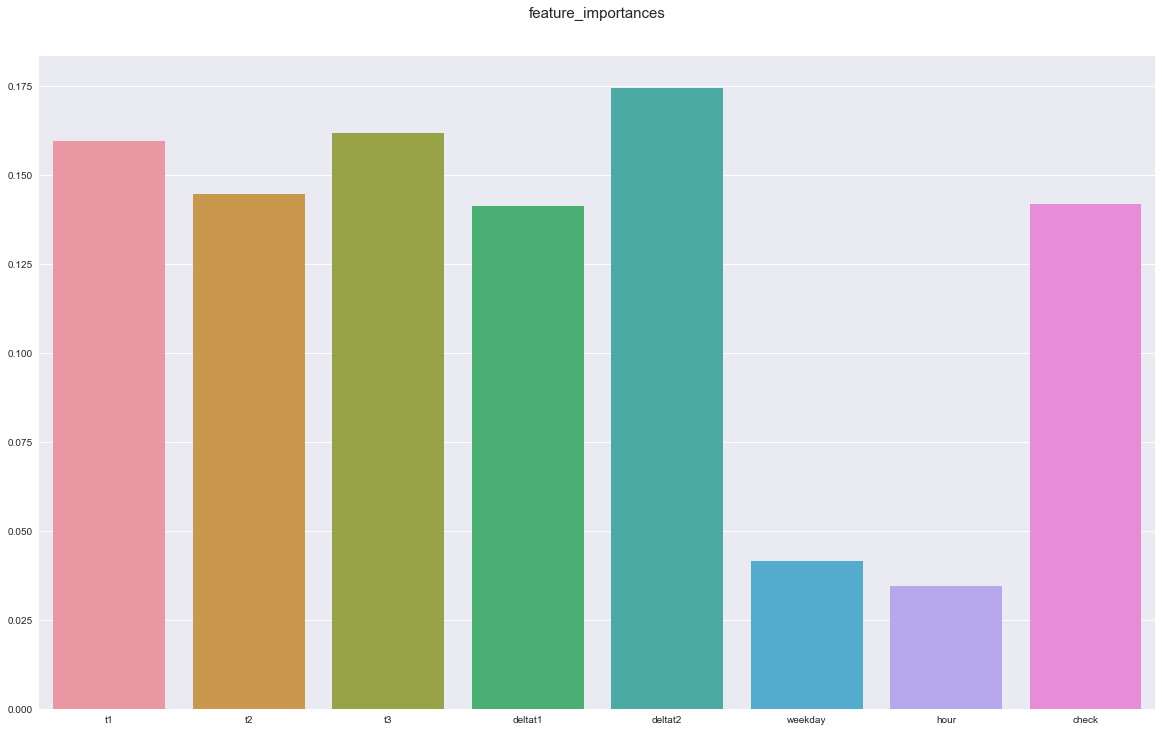

In [15]:
A3_feature=gbm.feature_importances_
feature=pd.DataFrame(data=[A3_feature], columns=['t1','t2','t3','deltat1','deltat2','weekday','hour','check'])
plt.figure(figsize=(20,12))
plt.title('feature_importances', y=1.05, size=15)
sns.barplot(data=feature)

# B1model

In [16]:
x_data = B1[['weekday','hour','time','temperature','rel_humidity','wind_speed','precipitation']].values #train 特徵
y_data = B1[['avg_travel_time']].values #labal
x = B1pre[['weekday','hours','minute','temperature','rel_humidity','wind_speed','precipitation']].values #train 特徵
y = B1pre[['travel_time']].values #labal

In [17]:
gbm = xgb.XGBRegressor( learning_rate =0.01,n_estimators=250,max_depth=5).fit(x_data, y_data)
y = gbm.predict(x)

In [18]:
B1pre['travel_time']=y

/Users/only_we/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


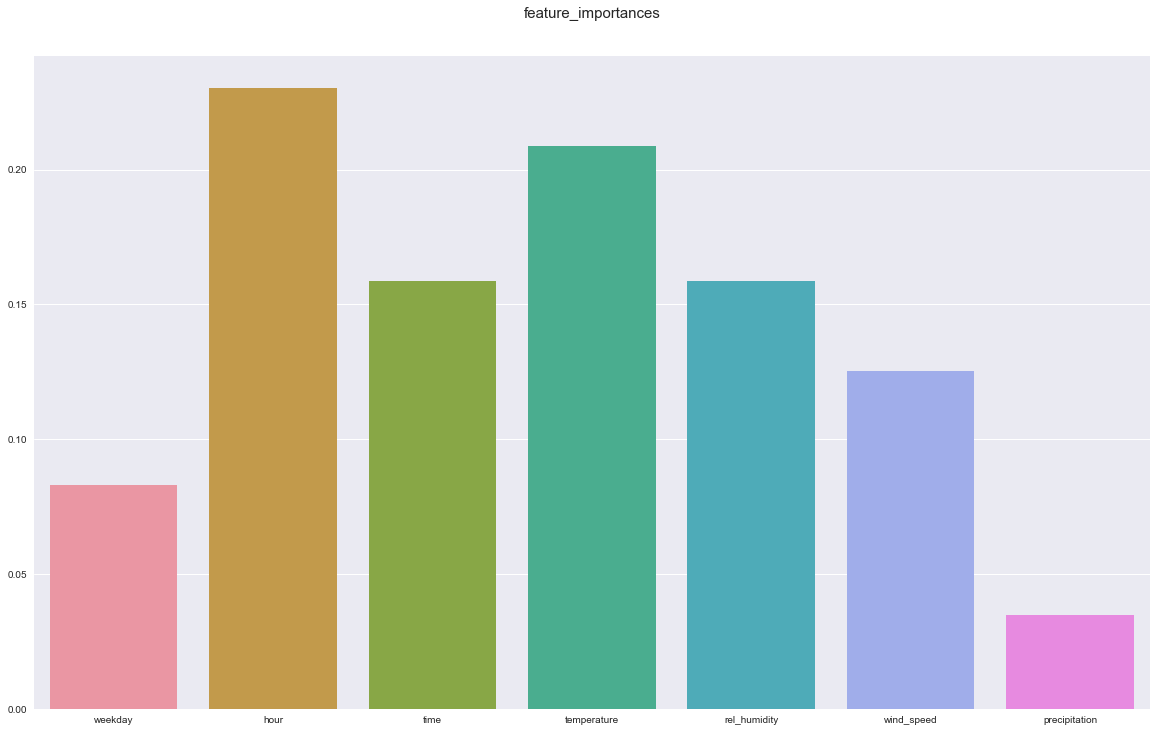

In [19]:
B1_feature=gbm.feature_importances_
feature=pd.DataFrame(data=[B1_feature], columns=['weekday','hour','time','temperature','rel_humidity','wind_speed','precipitation'])
plt.figure(figsize=(20,12))
plt.title('feature_importances', y=1.05, size=15)
sns.barplot(data=feature)

# B3model

In [20]:
x_data = B3[['t1','t2','t3','deltat1','deltat2','weekday','hour','check']].values #train 特徵
y_data = B3[['avg_travel_time']].values #labal
x= B3pre[['t1','t2','t3','deltat1','deltat2','weekday','hours','check']].values #train 特徵
y = B3pre[['travel_time']].values #labal

In [21]:
gbm = xgb.XGBRegressor( learning_rate =0.03,
 n_estimators=100,
 max_depth=5,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.75,
 objective= 'reg:linear',
 reg_alpha=1.5,
 reg_lambda= 1.5,
 nthread=4,
 scale_pos_weight=1,
 seed=27).fit(x_data, y_data)

In [22]:
for c in range(len(x)):
    o = gbm.predict(x[c:c+1])
    y[c]=o
    if c+1 == len(x):
        break
    elif (((c+1)%25)!=0):
        x[c+1][0]=o
        x[c+1][1]=x[c][0]
        x[c+1][2]=x[c][1]
        x[c+1][3]=o-x[c][0]
        x[c+1][4]=x[c][0]-x[c][1]

In [23]:
B3pre['travel_time']=y

/Users/only_we/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


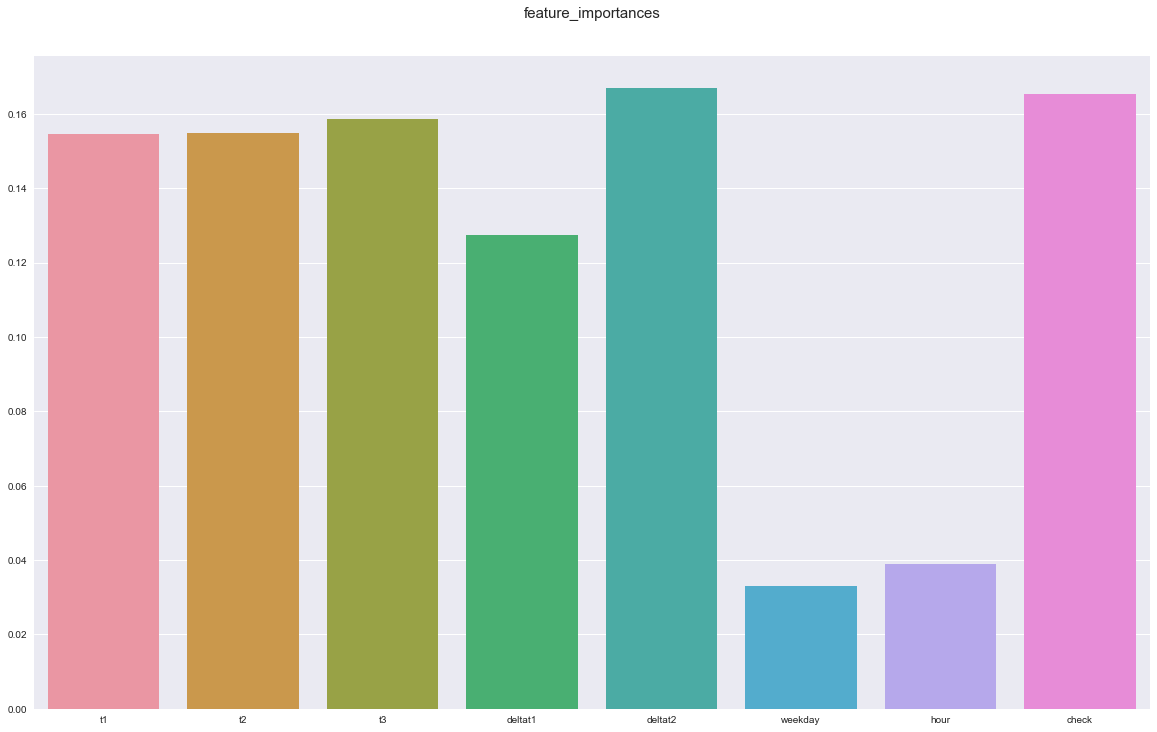

In [24]:
B3_feature=gbm.feature_importances_
feature=pd.DataFrame(data=[B3_feature], columns=['t1','t2','t3','deltat1','deltat2','weekday','hour','check'])
plt.figure(figsize=(20,12))
plt.title('feature_importances', y=1.05, size=15)
sns.barplot(data=feature)

# C1model

In [25]:
x_data = C1[['weekday','hour','time','temperature','rel_humidity','wind_speed','precipitation']].values #train 特徵
y_data = C1[['avg_travel_time']].values #labal
x = C1pre[['weekday','hours','minute','temperature','rel_humidity','wind_speed','precipitation']].values #train 特徵
y = C1pre[['travel_time']].values #labal

In [26]:
gbm = xgb.XGBRegressor( learning_rate =0.01,n_estimators=250,max_depth=5).fit(x_data, y_data)
y = gbm.predict(x)

In [27]:
C1pre['travel_time']=y

/Users/only_we/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


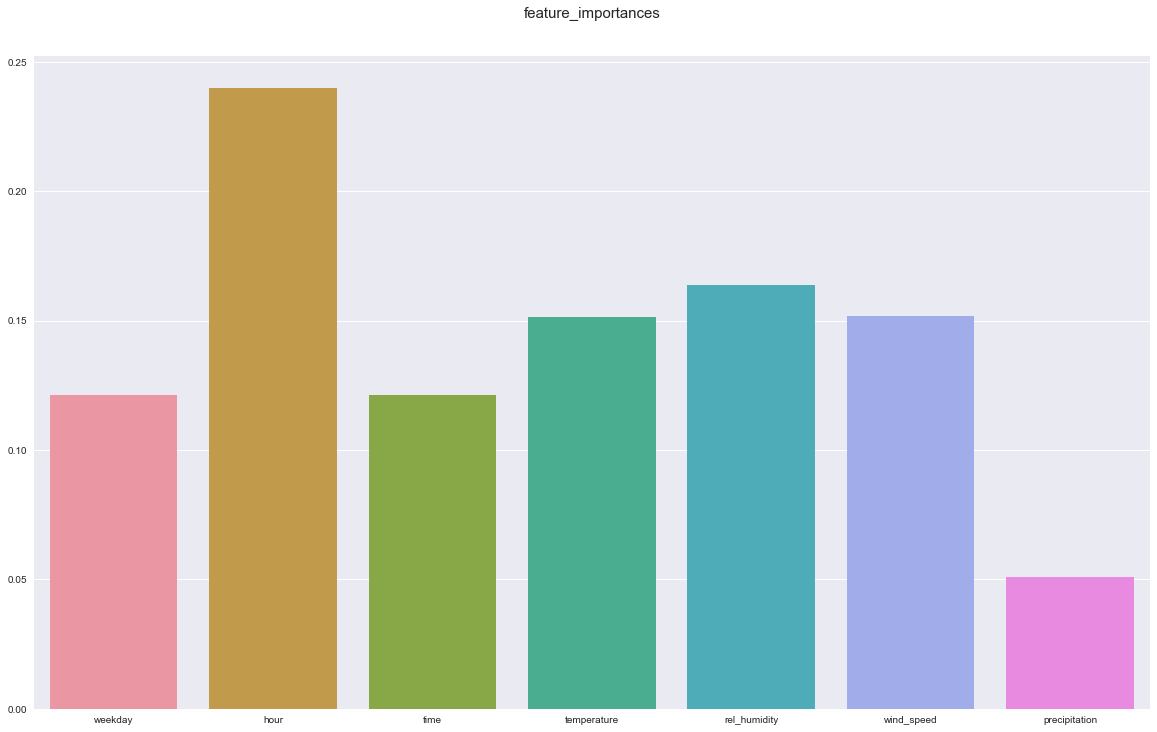

In [28]:
C1_feature=gbm.feature_importances_
feature=pd.DataFrame(data=[C1_feature], columns=['weekday','hour','time','temperature','rel_humidity','wind_speed','precipitation'])
plt.figure(figsize=(20,12))
plt.title('feature_importances', y=1.05, size=15)
sns.barplot(data=feature)

# C3model

In [29]:
x_data = C3[['t1','t2','t3','deltat1','deltat2','weekday','hour','check']].values #train 特徵
y_data = C3[['avg_travel_time']].values #labal
x= C3pre[['t1','t2','t3','deltat1','deltat2','weekday','hours','check']].values #train 特徵
y = C3pre[['travel_time']].values #labal

In [30]:
gbm = xgb.XGBRegressor( learning_rate =0.003,
 n_estimators=1500,
 max_depth=3,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.75,
 objective= 'reg:linear',
 reg_alpha=1.5,
 reg_lambda= 1.5,
 nthread=4,
 scale_pos_weight=1,
 seed=27).fit(x_data, y_data)

In [31]:
for c in range(len(x)):
    o = gbm.predict(x[c:c+1])
    y[c]=o
    if c+1 == len(x):
        break
    elif (((c+1)%25)!=0):
        x[c+1][0]=o
        x[c+1][1]=x[c][0]
        x[c+1][2]=x[c][1]
        x[c+1][3]=o-x[c][0]
        x[c+1][4]=x[c][0]-x[c][1]

In [32]:
C3pre['travel_time']=y

/Users/only_we/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [33]:
C3pre.loc[(C3pre['hours']==8)|(C3pre['hours']==9),'travel_time']=C3pre.loc[(C3pre['hours']==8)|(C3pre['hours']==9)]['travel_time']-10

/Users/only_we/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


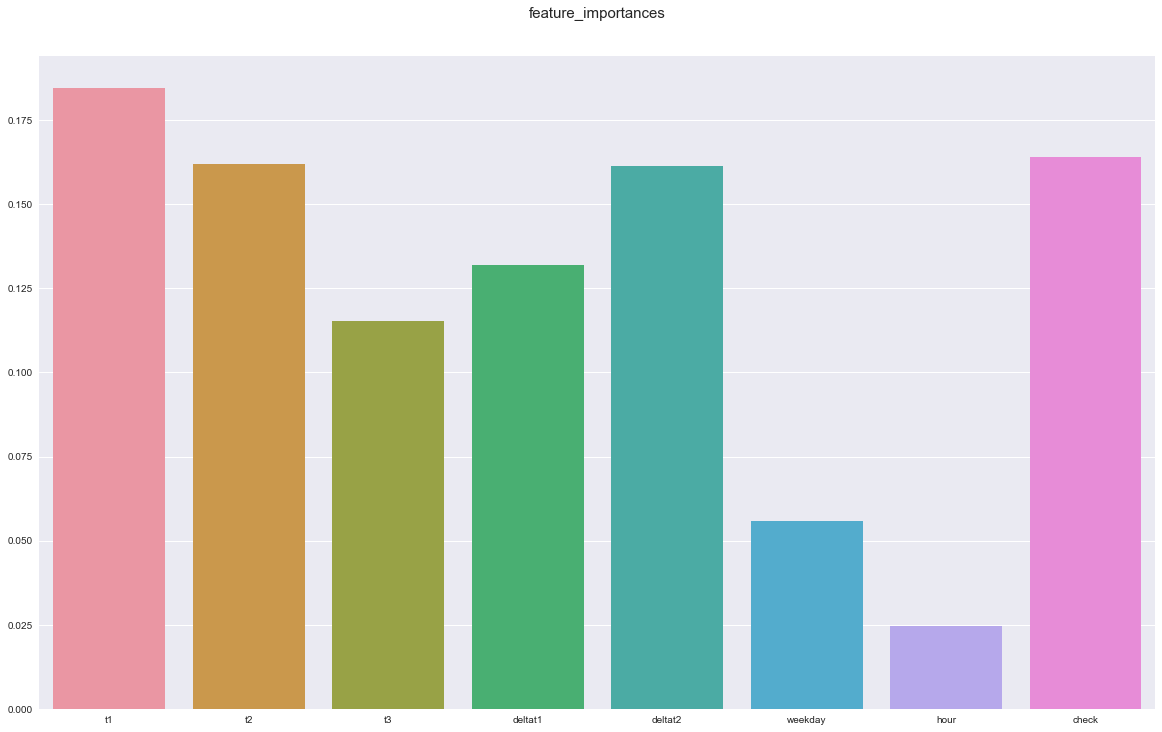

In [34]:
C3_feature=gbm.feature_importances_
feature=pd.DataFrame(data=[C3_feature], columns=['t1','t2','t3','deltat1','deltat2','weekday','hour','check'])
plt.figure(figsize=(20,12))
plt.title('feature_importances', y=1.05, size=15)
sns.barplot(data=feature)

# Concat

In [35]:
d=[A2pre,A3pre,B1pre,B3pre,C1pre,C3pre]

In [36]:
result=pd.concat(d,ignore_index=True)

In [37]:
result.columns

Index([u'day', u'hours', u'intersection_id', u't1', u't2', u't3', u'deltat1',
       u'deltat2', u'minute', u'month', u'starting_time', u'tollgate_id',
       u'travel_time', u'weekday', u'check', u'pressure', u'sea_pressure',
       u'wind_direction', u'wind_speed', u'temperature', u'rel_humidity',
       u'precipitation'],
      dtype='object')

In [38]:
result.to_csv('result_data.csv',index=False)

In [39]:
def avgTravelTime(in_file,path,out_suffix):
    file_suffix = '.csv'
    in_file_name = in_file + file_suffix
    out_file_name = out_suffix + file_suffix

    # Step 1: Load trajectories
    fr = open(path + in_file_name, 'r')
    fr.readline()  # skip the header
    traj_data = fr.readlines()
    fr.close()
    print(traj_data[0])

    # Step 2: Create a dictionary to store travel time for each route per time window
    travel_times = {}  # key: route_id. Value is also a dictionary of which key is the start time for the time window and value is a list of travel times
    for i in range(len(traj_data)):
        each_traj = traj_data[i].replace('"', '').split(',')
        intersection_id = each_traj[2]
        tollgate_id = each_traj[11]

        route_id = intersection_id + '-' + tollgate_id
        if route_id not in travel_times.keys():
            travel_times[route_id] = {}

        trace_start_time = each_traj[10]
        trace_start_time = datetime.strptime(trace_start_time, "%Y-%m-%d %H:%M:%S")
        if (trace_start_time.hour==10) | (trace_start_time.hour==19):
            time_window_minute = math.floor((trace_start_time-timedelta(minutes=1)).minute / 20) * 20
            start_time_window = datetime(trace_start_time.year, trace_start_time.month, trace_start_time.day,
                                         (int(trace_start_time.hour)-1), int(time_window_minute), 0)
        else:
            time_window_minute = math.floor(trace_start_time.minute / 20) * 20
            start_time_window = datetime(trace_start_time.year, trace_start_time.month, trace_start_time.day,
                                         int(trace_start_time.hour), int(time_window_minute), 0)
        tt = float(each_traj[12]) # travel time

        if start_time_window not in travel_times[route_id].keys():
            travel_times[route_id][start_time_window] = [tt]
        else:
            travel_times[route_id][start_time_window].append(tt)
    oo=travel_times.keys()
    oo.sort()

    # Step 3: Calculate average travel time for each route per time window
    fw = open(out_file_name, 'w')
    fw.writelines(','.join(['"intersection_id"', '"tollgate_id"', '"time_window"', '"avg_travel_time"']) + '\n')
    for route in oo:
        route_time_windows = list(travel_times[route].keys())
        route_time_windows.sort()
        for time_window_start in route_time_windows:
            time_window_end = time_window_start + timedelta(minutes=20)
            tt_set = travel_times[route][time_window_start]
            avg_tt = round(sum(tt_set) / float(len(tt_set)), 2)
            out_line = ','.join(['"' + route.split('-')[0] + '"', '"' + route.split('-')[1] + '"',
                                 '"[' + str(time_window_start) + ',' + str(time_window_end) + ')"',
                                 '"' + str(avg_tt) + '"']) + '\n'
            fw.writelines(out_line)
    fw.close()
    return

In [40]:
in_file = 'result_data'
path='./'
out_suffix = 'KDD_final_20min_avg_result_data'
avgTravelTime(in_file,path,out_suffix)

25,8,A,57.09,64.96,55.95,-7.86999999999999,9.009999999999991,0,10,2016-10-25 08:00:00,2,66.42680358886719,2,96,0.0,1015.2,37.0,4.3,19.5,78.0,0.0



In [41]:
print 'end'

end
